In [54]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
import seaborn as sbn
from PIL import Image
from scipy import ndimage

%matplotlib inline

In [55]:
    train_ds=np.genfromtxt("./data.csv",delimiter=',',dtype=np.unicode_)
    train_ds_int=np.genfromtxt("./data.csv",delimiter=',')
    train_dst=np.transpose(train_ds)
    train_dst_int=np.transpose(train_ds_int)

We first consider a histogram of the salary range of various employees, removing the outliers

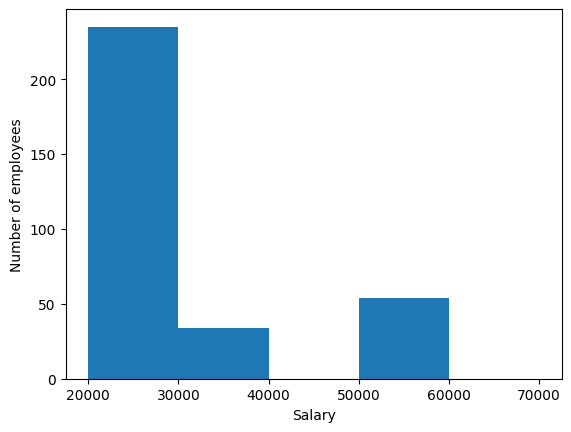

In [61]:
train_dst_salary=np.array(train_dst_int[-5][1:])
plt.hist(train_dst_salary,bins=range(20000,80000,10000))
plt.xlabel('Salary')
plt.ylabel('Number of employees')
plt.show()

We also consider the gender split of the employees

<BarContainer object of 2 artists>

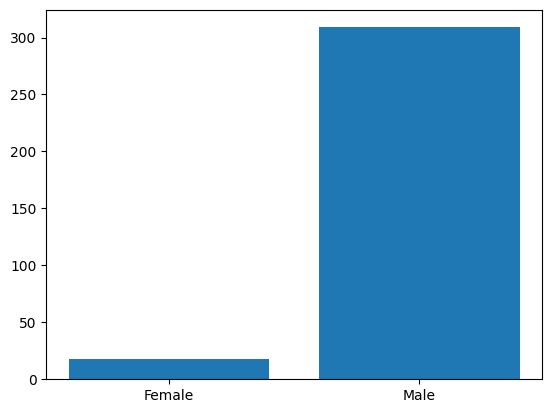

In [77]:

height=[np.count_nonzero(train_dst[10][1:]=='Female'),np.count_nonzero(train_dst[10][1:]=='Male')]
plt.bar(['Female','Male'],height)

The first analysis with the data is a scatter plot with Engagement Score(% satisfaction) vs Salary to understand if an increased salary directly correlates to increased happiness, and also to consider the fraction of employees in the top right quadrant, that is with high salary and high happiness. The outliers in salary are removed to ensure that the scale of the axis work well.



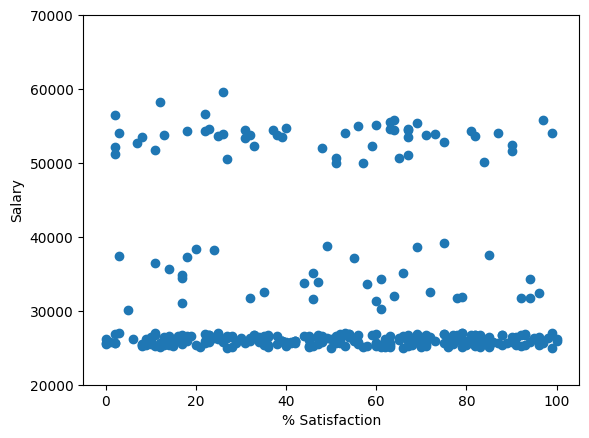

In [57]:
    
    train_dst_satisfaction=np.zeros(len(train_dst[-4])-1,dtype=np.float32)
    for i in range(1,len(train_dst[-4])-1):
        train_dst_satisfaction[i]=train_dst[-4][i][:-1]
    plt.figure()
    plt.scatter(train_dst_satisfaction,train_dst_salary)
    plt.ylim(20000,70000)
    plt.xlabel('% Satisfaction')
    plt.ylabel('Salary')
    plt.show()
    

The scatter plot shows that there is a large fraction employees evenly distributed on the satisfaction scale around the 25000-27000 salary range. There is a sparse distribution of people drawing a salary between 27000 and 50000. There is also an even distribution on the satisfaction scale in the 50000-60000 salary region. This shows that there is no direct correlation between higher salary and higher satisfaction. 


The second analysis deals with another scatter plot, this time with the duration worked in the company and the satisfaction percentage, aiming to check if employees who work longer leave more satisfied. 

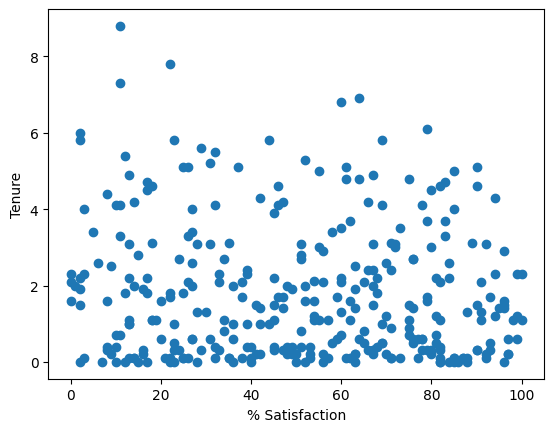

In [58]:
    train_dst_tenure=np.array(train_dst[9][1:])
    for i in range(len(train_dst_tenure)):
        train_dst_tenure[i]=train_dst_tenure[i].replace(' ','')
    train_dst_tenure=np.array(train_dst_tenure,dtype=np.float32)
    train_dst_satisfaction=np.zeros(len(train_dst[-4])-1,dtype=np.float32)
    for i in range(1,len(train_dst[-4])-1):
        train_dst_satisfaction[i]=train_dst[-4][i][:-1]
    plt.figure()
    plt.scatter(train_dst_satisfaction, train_dst_tenure)
    plt.xlabel('% Satisfaction')
    plt.ylabel('Tenure')
    plt.show()
    

The result shows that there is a high percentage of employees who worked for >2 years but left with a <40 % satisfaction, which is typical of a corporate environment